# Exercício de Programação: Gradiente Descendente

Neste notebook, você implementará e explorará os algoritmos de Gradiente Descendente em Lote (Batch) e Estocástico (Stochastic) para treinar um modelo de Regressão Linear.

## Parte 1: Gerar Dados Sintéticos

Aqui você pode aproveitar a geração de dados sintéticos que utilizou no exercício anterior (Regressão Linear).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

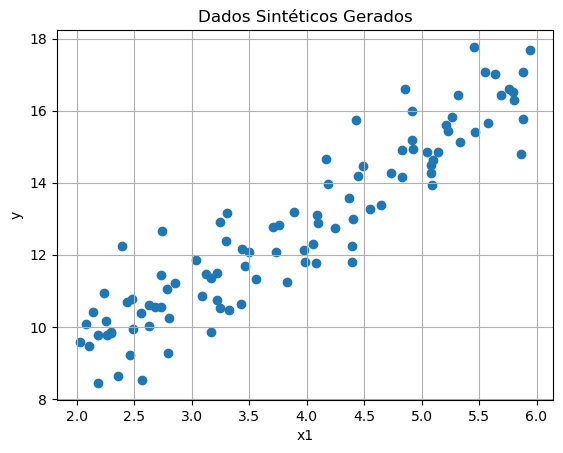

In [2]:
# Para garantir que seja possível reproduzir os resultados
np.random.seed(42)

# Gere 100 instâncias
m = 100

# X=mınimo+(maximo−mınimo)∗rand
X = 2 + 4 * np.random.rand(m, 1)  # column vector
y = 5 + 2 * X + np.random.randn(m, 1)  # column vector

# Essa linha adiciona uma coluna de 1s no início da matriz X
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
# Vamos plotar os dados para visualizá-los
plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Dados Sintéticos Gerados")
plt.grid(True)
plt.show()

## Parte 2: Gradiente Descendente em Lote (Batch GD)

O Gradiente Descendente em Lote calcula os gradientes com base em todo o conjunto de treinamento a cada passo. A fórmula para o vetor de gradiente da função de custo MSE é:

$$ \nabla_{\theta} \text{MSE}(\theta) = \frac{2}{m} X^T (X\theta - y) $$

E o passo de atualização dos pesos é:

$$ \theta^{(\text{próximo passo})} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta) $$

**Sua tarefa:** Adicione o termo de viés e implemente o Batch GD.

In [3]:
# taxa de aprendizado (quanto o modelo ajusta os parâmetros a cada iteração).
eta = 0.05  

# número de iterações do gradiente descendente
n_epochs = 1000

# número de amostras no conjunto de dados
m = len(X_b)

np.random.seed(42)

# vetor de parâmetros que será ajustado (inicializado com valores aleatórios)
theta_solution = np.random.randn(2, 1)  # inicialização aleatória dos parâmetros

# Calcula o gradiente do erro em relação a theta_solution.
# Atualiza os parâmetros com a fórmula do gradiente descendente:
# θ = θ - η * gradiente
# No final, imprime o valor de theta encontrado.
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta_solution - y)  # corrigido
    theta_solution = theta_solution - eta * gradients

print(f"Theta final (solução): {theta_solution.ravel()}")


Theta final (solução): [5.44369574 1.88536159]


### Explorando a Taxa de Aprendizagem (eta)

Agora, vamos observar como os parâmetros `theta` mudam após 200 iterações com diferentes taxas de aprendizagem. Isso nos ajuda a entender a importância desse hiperparâmetro. O que podemos concluir?

Para eta = 0.01, theta após 20 iterações: [2.38111884 2.6108893 ]
Para eta = 0.05, theta após 20 iterações: [4.60724046 2.08351873]
Para eta = 0.1, theta após 20 iterações: [-4.11083328e+78 -1.73525325e+79]


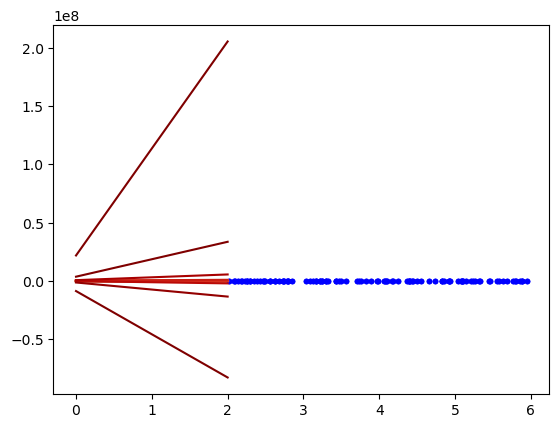

In [4]:
import matplotlib as mpl
# O eta é o valor que define a velocidade de aprendizado do modelo.
# Ele controla o tamanho dos ajustes feitos nos parâmetros durante o treinamento.

learning_rates = [0.01, 0.05, 0.10]

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

for eta in learning_rates:
    np.random.seed(42)
    theta = np.random.randn(2, 1)
    plt.plot(X, y, "b.")
    # m é o número de pontos do conjunto de dados.
  #  m = len(X_b)
    # Mas o código só vai mostrar 20 retas no gráfico para não poluir.
    n_shown = 20
    # theta_path vai guardar todos os valores de theta durante o aprendizado.
    theta_path = []
    for iteration in range(200):
        if iteration < n_shown:
            # Calcula os valores previstos (y_predict) com a reta atual.
            y_predict = X_new_b @ theta
            # Escolhe uma cor diferente para cada passo.
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            # Desenha no gráfico a reta atual — assim você vê a linha mudando aos poucos.
            plt.plot(X_new, y_predict, linestyle="solid", color=color)

        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
        
    print(f"Para eta = {eta}, theta após 20 iterações: {theta.ravel()}")


## Parte 3: Gradiente Descendente Estocástico (Stochastic GD)

O Gradiente Descendente Estocástico acelera o processo calculando os gradientes com base em uma única instância aleatória a cada passo. Devido à sua natureza aleatória, é comum usar um **agendamento de aprendizagem** para diminuir gradualmente a taxa de aprendizagem.

Neste exercício, usaremos a função de agendamento: `learning_rate = 5 / (t + 500)`, onde `t` é o número da iteração.

**Sua tarefa:** Complete o código abaixo para implementar o Stochastic GD. Compare com o resultado do Batch GD. Note que executamos apenas 100 épocas.

Theta final (solução): [ 0.49671415 -0.1382643 ]


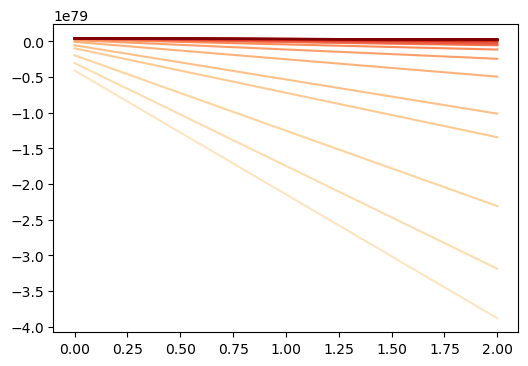

In [5]:
# O objetivo é ajustar os parâmetros (theta) do modelo aos poucos, para que o erro 
# entre o valor previsto e o valor real seja o menor possível.

# guarda todos os valores de theta durante o treino (só pra visualização).
theta_path_sgd = [] 

# O treinamento vai repetir o processo 50 vezes (50 épocas).
n_epochs = 100

# t0 e t1 são usados para controlar a taxa de aprendizado (eta).
#  → Em vez de ser fixa, ela diminui com o tempo.
t0, t1 = 5, 500  # hiperparâmetros do agendamento de aprendizagem

# Essa função faz com que a cada iteração, o “eta” (taxa de aprendizado) fique um pouquinho menor.
# Isso é bom, porque no começo o modelo aprende rápido,
#  mas depois faz ajustes menores para não “passar do ponto” (evita oscilar).
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta_solution_sgd = np.random.randn(2, 1)  # inicialização aleatória

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

# epoch: repete o processo 100 vezes (passa por todo o conjunto de dados);
for epoch in range(n_epochs):

    # iteration: dentro de cada época, ele pega uma amostra por vez (isso é o estocástico).
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:

        #Escolhe uma linha aleatória dos dados (xi, yi);
        #Calcula o erro entre o valor previsto e o valor real;
        #Calcula o gradiente, que mostra em que direção deve ajustar theta para reduzir o erro.
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m

        # Calcula a taxa de aprendizado (eta) atual — ela fica menor a cada iteração.
        eta = learning_schedule(epoch * m + iteration)

        # Atualiza theta:
        # Fórmula:
        # θ_novo = θ_antigo - η × gradiente
        #
        # Significado:
        # - θ_antigo → valor atual dos parâmetros do modelo
        # - η (eta) → taxa de aprendizado, controla o tamanho do passo
        # - gradiente → direção e intensidade da inclinação do erro
        #
        # Ou seja: damos um passo na direção contrária do gradiente
        # para reduzir o erro e melhorar o modelo.
        theta = theta - eta * gradients



        theta_path_sgd.append(theta)  # extra code – to generate the figure


print(f"Theta final (solução): {theta_solution_sgd.ravel()}")

## Parte 4: Stochastic GD com Scikit-Learn

O Scikit-Learn oferece a classe `SGDRegressor`, que implementa o Gradiente Descendente Estocástico para regressão.

**Sua tarefa:** Use a classe `SGDRegressor` para treinar um modelo nos mesmos dados sintéticos. Em seguida, imprima o intercepto (`intercept_`) e o coeficiente (`coef_`) encontrados. Use 0.05 para a taxa de aprendizagem inicial (eta0), 100 épocas e random_state=42.

In [6]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

print(f"Intercepto do Scikit-learn (solução): {sgd_reg.intercept_}")
print(f"Coeficiente do Scikit-learn (solução): {sgd_reg.coef_}")

Intercepto do Scikit-learn (solução): [5.37748807]
Coeficiente do Scikit-learn (solução): [1.90071805]


### Conclusão

Compare os valores de `theta` que você encontrou com a implementação manual (tanto Batch quanto Stochastic) e com a implementação do Scikit-Learn. Eles devem ser muito próximos!

Os parâmetros da função original eram intercepto = 5 e coeficiente = -2. Nossos resultados devem estar próximos a esses valores, com pequenas variações devido ao ruído que adicionamos aos dados.